# HW7: Classification

## Syed Nisar Hussain

### sh07216@st.habib.edu.pk


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### Classification using Admission_Chance_Classification.csv


In [86]:
df = pd.read_csv('Admission_Chance_Classification.csv')

In [87]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,YES,YES
1,324,107,4,4.0,4.5,8.87,YES,YES
2,316,104,3,3.0,3.5,8.00,YES,YES
3,322,110,3,3.5,2.5,8.67,YES,YES
4,314,103,2,2.0,3.0,8.21,NO,YES


In [88]:
df.shape

(400, 8)

In [89]:
df.dtypes

GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
 SOP                 float64
LOR                  float64
CGPA                 float64
Research              object
Admit                 object
dtype: object

In [90]:
X = df.drop(['Admit'], axis=1)
Y = df['Admit']

In [91]:
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,YES
1,324,107,4,4.0,4.5,8.87,YES
2,316,104,3,3.0,3.5,8.00,YES
3,322,110,3,3.5,2.5,8.67,YES
4,314,103,2,2.0,3.0,8.21,NO
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,YES
396,325,107,3,3.0,3.5,9.11,YES
397,330,116,4,5.0,4.5,9.45,YES
398,312,103,3,3.5,4.0,8.78,NO


In [92]:
X = pd.get_dummies(X, columns=['Research'], dtype=int)
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research_NO,Research_YES
0,337,118,4,4.5,4.5,9.65,0,1
1,324,107,4,4.0,4.5,8.87,0,1
2,316,104,3,3.0,3.5,8.00,0,1
3,322,110,3,3.5,2.5,8.67,0,1
4,314,103,2,2.0,3.0,8.21,1,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,0,1
396,325,107,3,3.0,3.5,9.11,0,1
397,330,116,4,5.0,4.5,9.45,0,1
398,312,103,3,3.5,4.0,8.78,1,0


In [93]:
Y

0      YES
1      YES
2      YES
3      YES
4      YES
      ... 
395    YES
396    YES
397    YES
398    YES
399    YES
Name: Admit, Length: 400, dtype: object

Part 1 and 2: Train Test Split with Random Seed


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [95]:
X_train.shape, y_train.shape

((280, 8), (280,))

In [96]:
X_test.shape, y_train.shape

((120, 8), (280,))

Part 3: Decision Tree


In [97]:
dt = tree.DecisionTreeClassifier(random_state=99)

In [98]:
dtmodel = dt.fit(X_train,y_train)

In [99]:
test_pred = dtmodel.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
accuracy * 100

89.16666666666667

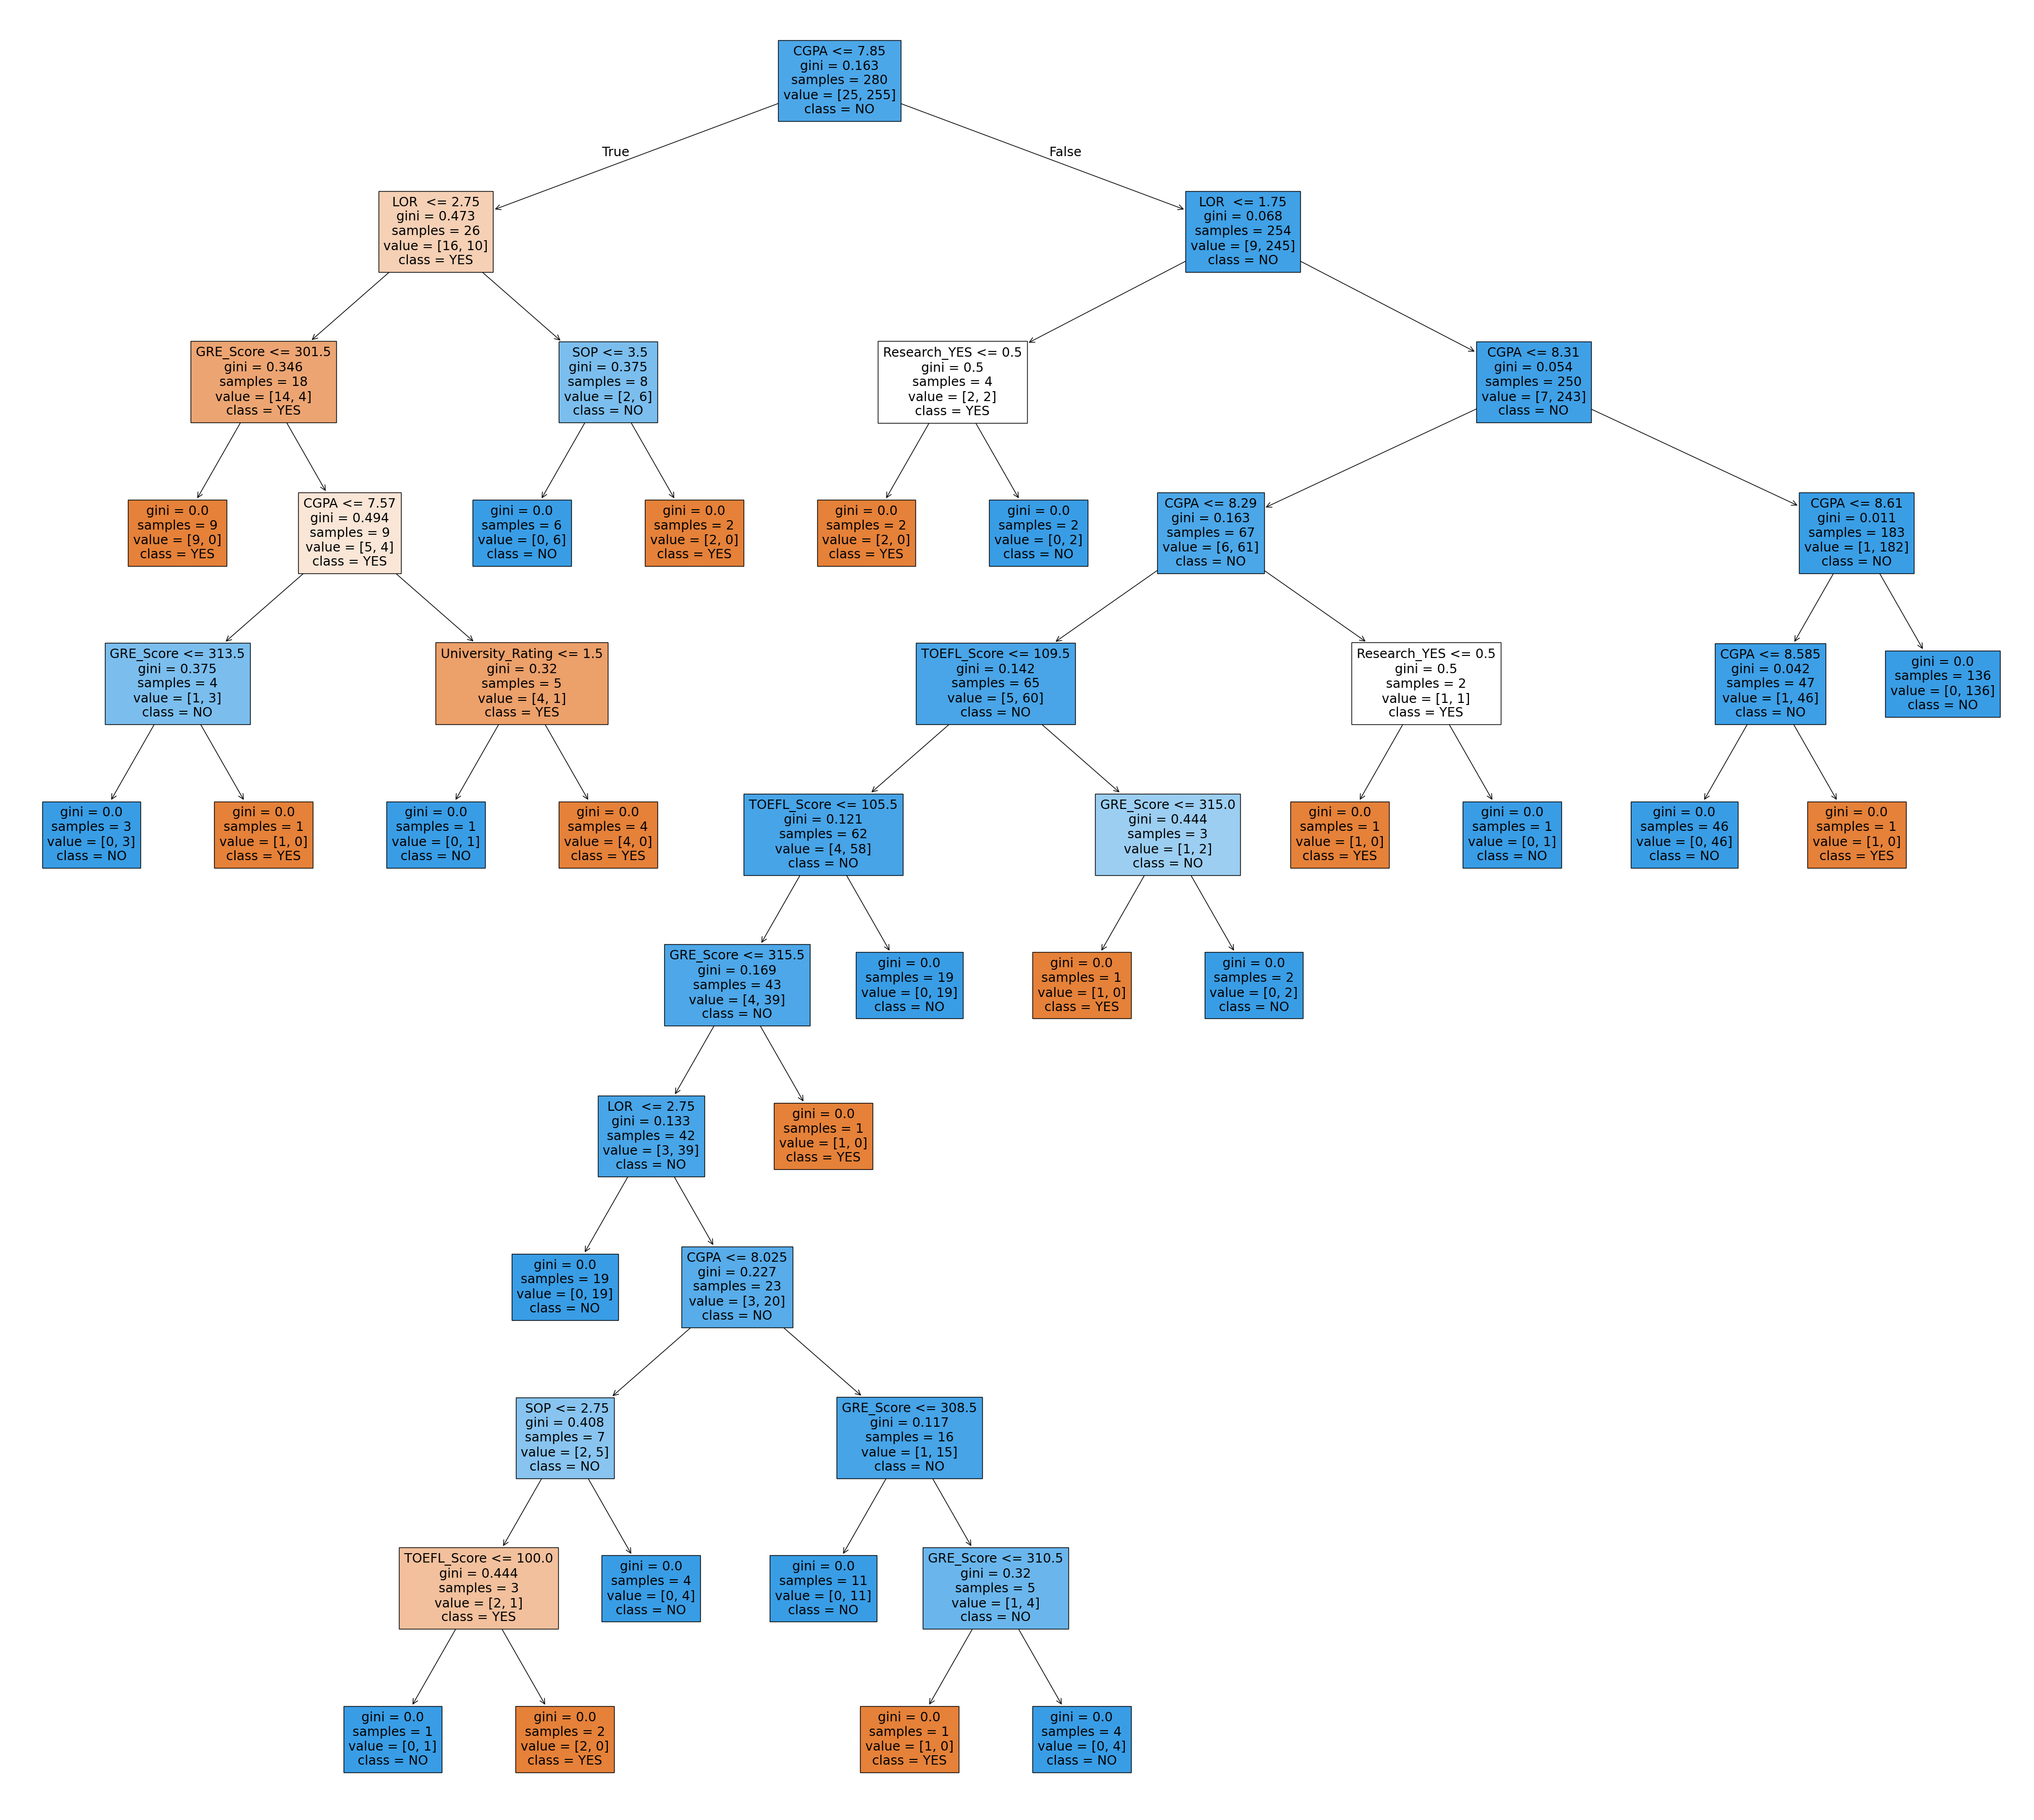

In [100]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)
plt.savefig('DecisionTree.png')

Interpretation: In this decision tree for admission chance classification, CGPA (Cumulative Grade Point Average) is the most influential attribute, as it appears at the root and dictates the first major split, highlighting its strong correlation with admission chances. This suggests that students with higher CGPAs are more likely to be admitted. GRE Score (Graduate Record Examination) and TOEFL Score (Test of English as a Foreign Language) also play significant roles, appearing in multiple nodes. These standardized test scores are crucial in the admissions process, with higher scores favoring a positive admission outcome. Research experience is another important factor, particularly for candidates with average or borderline academic metrics, as it can tip the decision in their favor. On the other hand, University Rating is less important, appearing only in a few branches, indicating that the prestige of the applicant's prior institution has less impact compared to academic performance and test scores. Overall, the tree highlights CGPA, GRE, TOEFL, and Research as key determinants of admission chances, while University Rating plays a minor role.


Part 4: Tree Pruning Analysis


Max accuracy = 93.33 at depth = 3


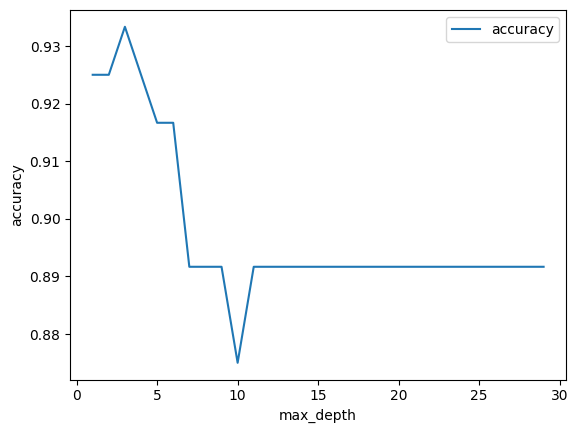

In [101]:
max_depth = []
acc = []

for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(max_depth=i,random_state=99)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})

print(f"Max accuracy = {max(acc)*100:.2f} at depth = {acc.index(max(acc)) + 1}")
plt.plot(d['max_depth'].values,d['accuracy'].values)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(["accuracy"])
plt.show()

In [102]:
dt = tree.DecisionTreeClassifier(max_depth=3,random_state=99)

In [103]:
dtmodel = dt.fit(X_train, y_train)

In [104]:
dttest_pred = dtmodel.predict(X_test)
accuracy = accuracy_score(y_test, dttest_pred)
accuracy * 100

93.33333333333333

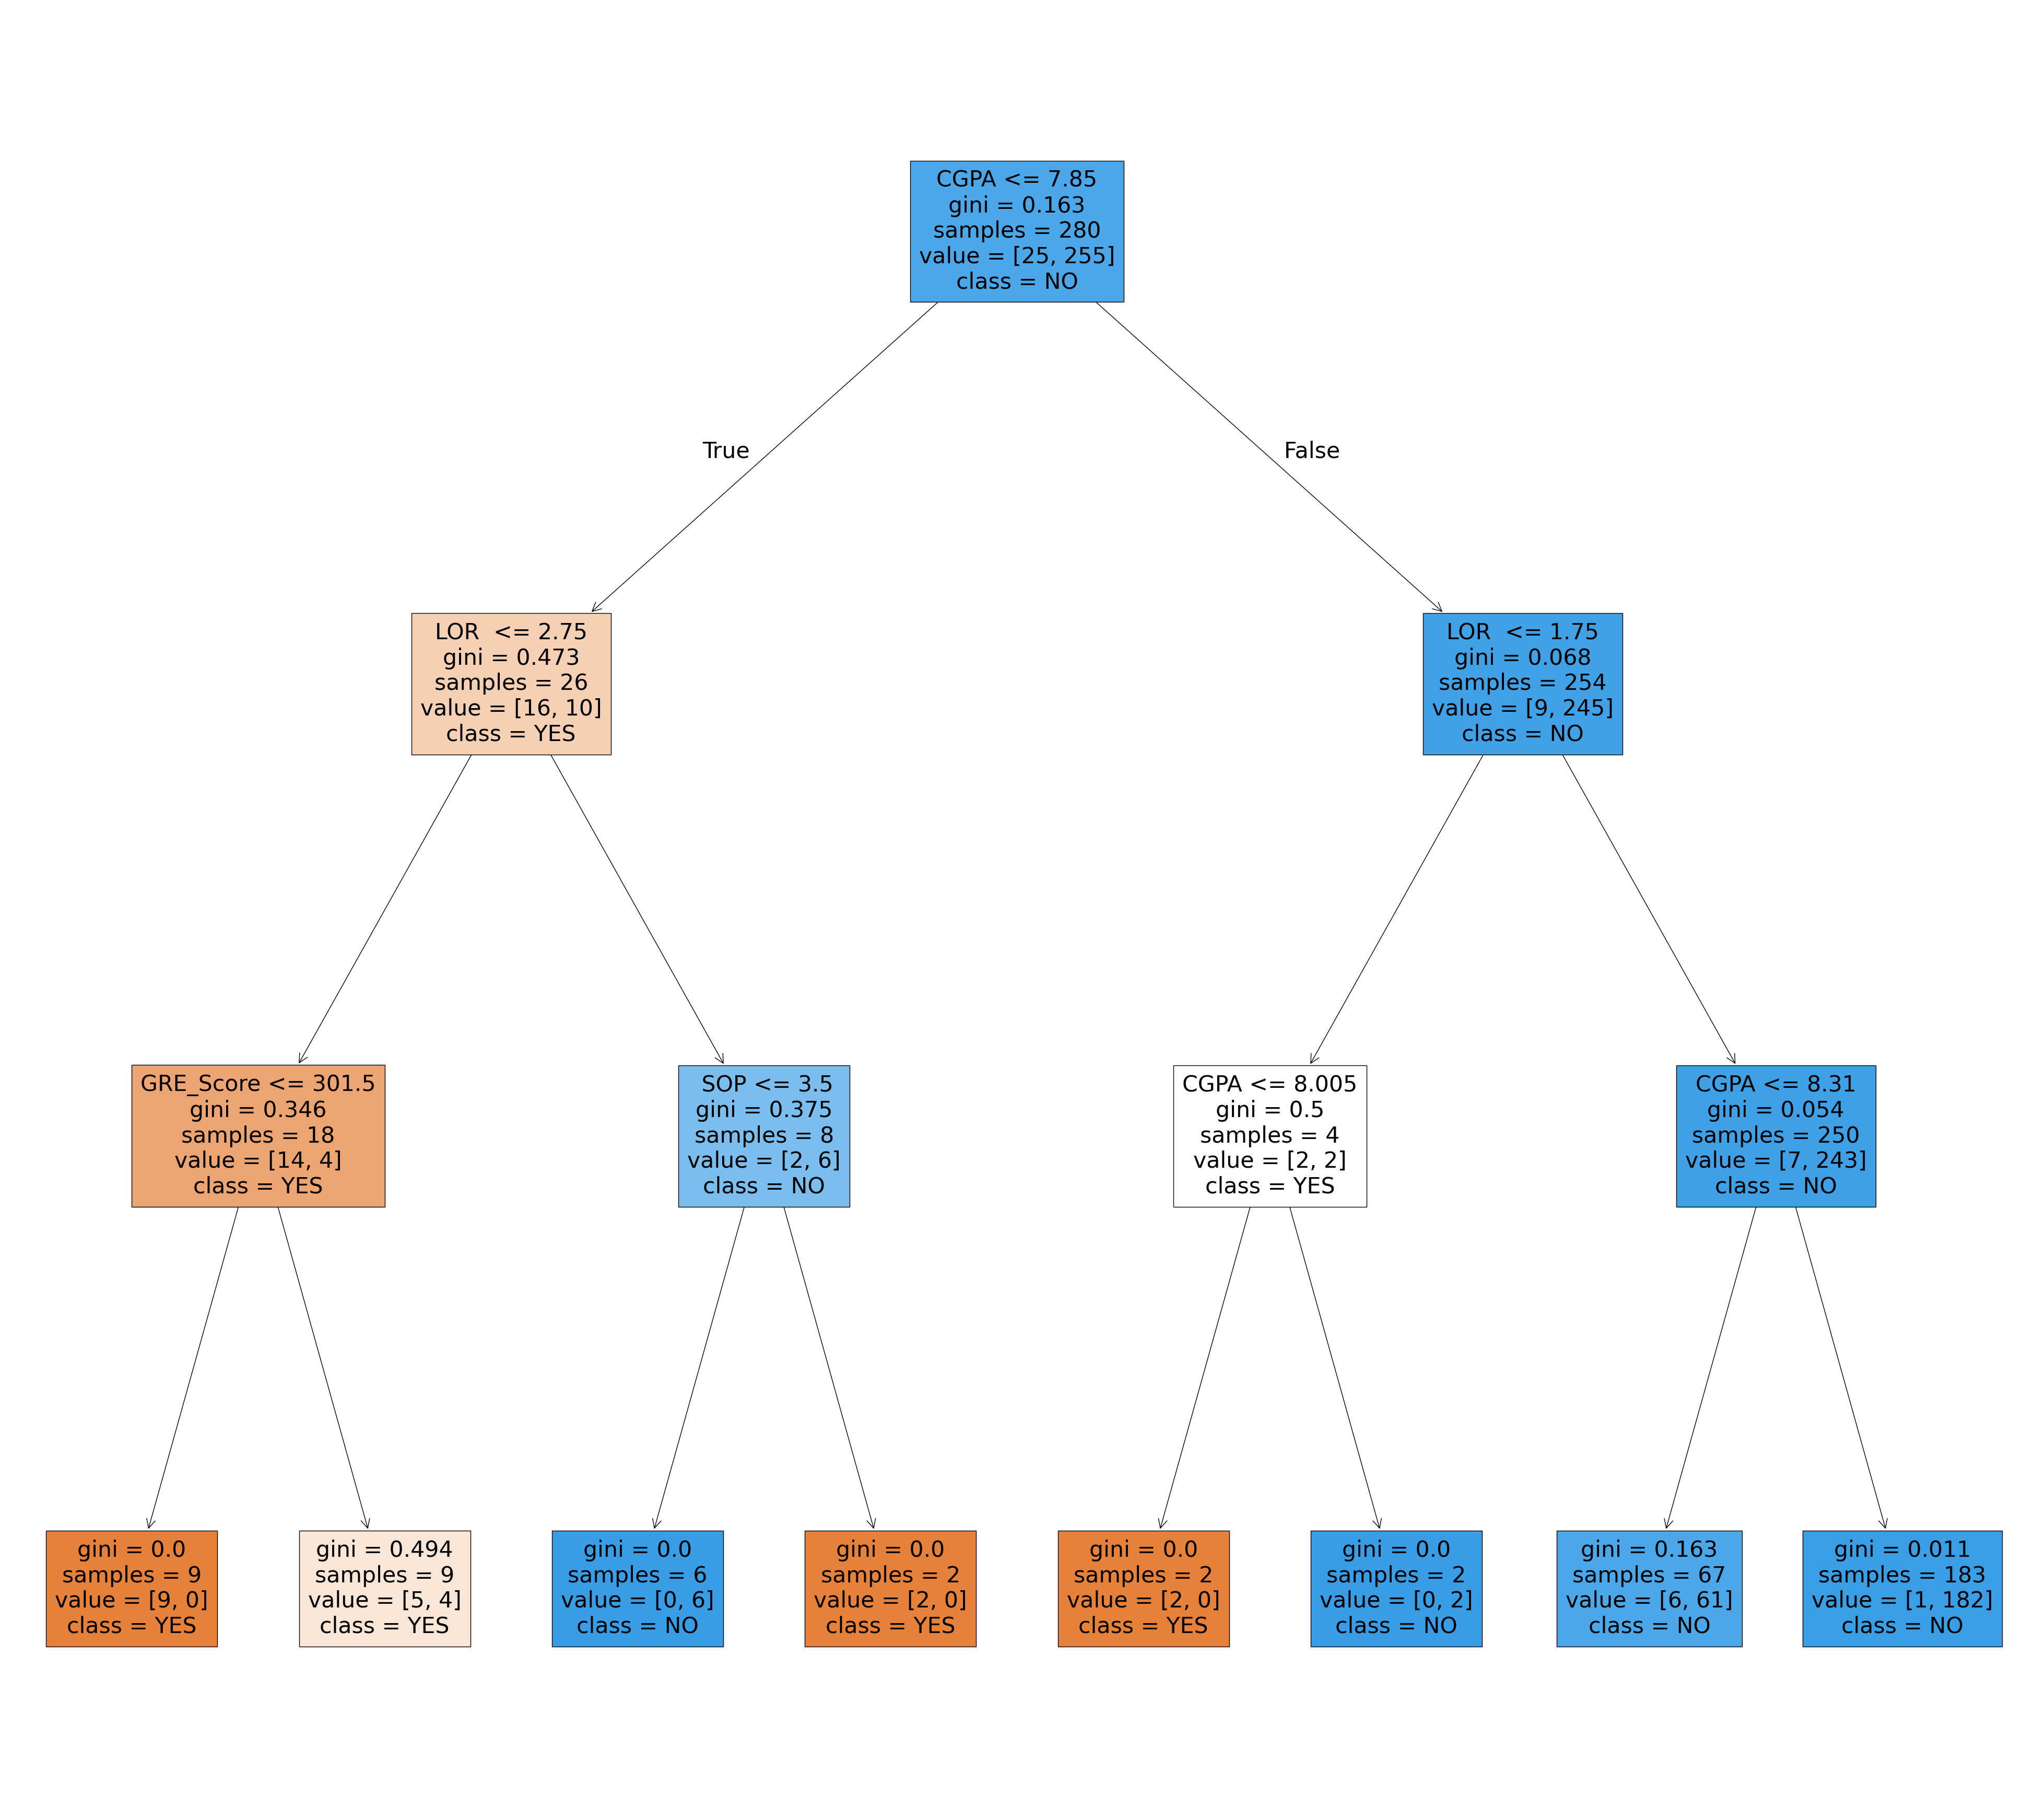

In [105]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)
plt.savefig('DecisionTreePrunned.png')

Interpretation: After pruning, the decision tree is simplified by removing nodes that provide little to no improvement in classification performance, resulting in a more concise and interpretable model. In this pruned version, CGPA remains the most important factor, with the first split occurring at a CGPA threshold of 7.85, similar to the original tree. LOR (Letter of Recommendation) is now a more prominent feature, appearing earlier in the tree as a key determinant after CGPA, especially for candidates with a CGPA below 7.85. Other features like GRE Score and SOP (Statement of Purpose) are also present but in a reduced manner compared to the original tree, as they now appear only in the lower branches. By pruning, unnecessary complexity and overfitting are reduced, making the tree easier to understand while maintaining a similar level of predictive accuracy. The overall classification process becomes more streamlined, focusing on the most critical features and removing those that do not significantly improve the model's decisions.


Part 5: Random Forest Classifier


In [106]:
n_estimators = [10, 50, 100, 150, 200]
acc = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, random_state=99)
    rfmodel = rf.fit(X_train, y_train)
    test_pred = rfmodel.predict(X_test)
    acc.append(accuracy_score(y_test, test_pred))

Max accuracy = 95.83 at n_estimators = 150


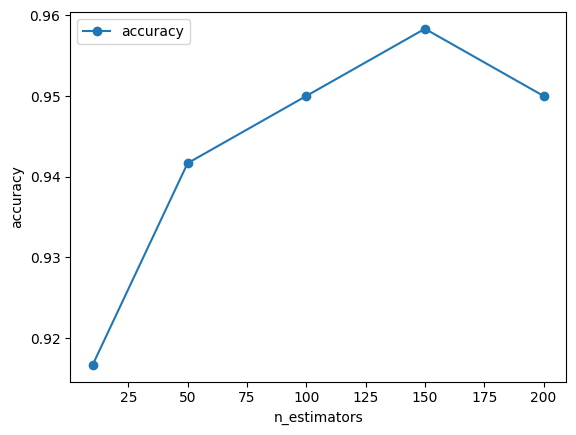

In [107]:
print(f"Max accuracy = {max(acc)*100:.2f} at n_estimators = {n_estimators[acc.index(max(acc))]}")
plt.plot(n_estimators,acc, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend(["accuracy"])
plt.show()

In [108]:
rf = RandomForestClassifier(n_estimators=150, random_state=99)

In [109]:
rfmodel = rf.fit(X_train, y_train)

In [110]:
rftest_pred = rfmodel.predict(X_test)
accuracy = accuracy_score(y_test, rftest_pred)
accuracy * 100

95.83333333333334

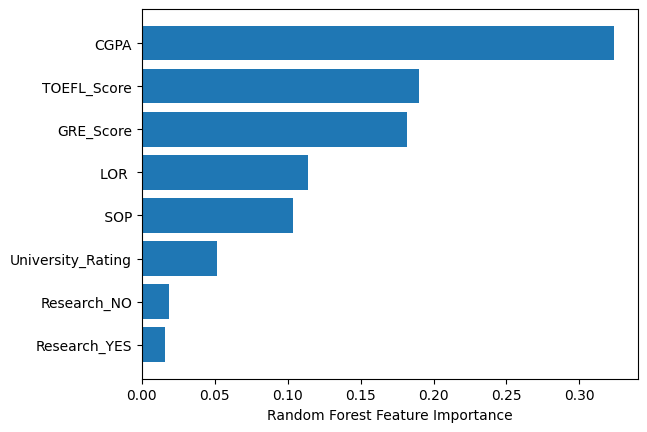

In [111]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

Interpretation: The Random Forest model was trained with different number of decision tree (n_estimators) such as 10, 50, 100, 150, and 200. We analysis the performance of the model with different n_estimates by plotting a graph of its accuracy numbers. From the graph, we can infer that the best performing model in terms of accuracy was the one with the 150 decision trees, giving an accuracy of 95.83. By analysing the features importance graph of this model, we can say that the results are very similar to what we saw in the Decision Tree. CGPA holds the most emphasis on the Admission process, followed by standardized test scores like TOEFL, and GRE. Whereas, Univeristy Rating and Research experience do not impact the chances of admission as much.


Part 6: Decision Tree vs Random Forest


In [112]:
dt_scores = cross_val_score(dtmodel, X, Y, cv=5)
rf_scores = cross_val_score(rfmodel, X, Y, cv=5)

print(f"Mean cross validation score of decision tree model: {dt_scores.mean()*100}")
print(f"Mean cross validation score of random forest model: {rf_scores.mean()*100}")

Mean cross validation score of decision tree model: 91.25
Mean cross validation score of random forest model: 92.5


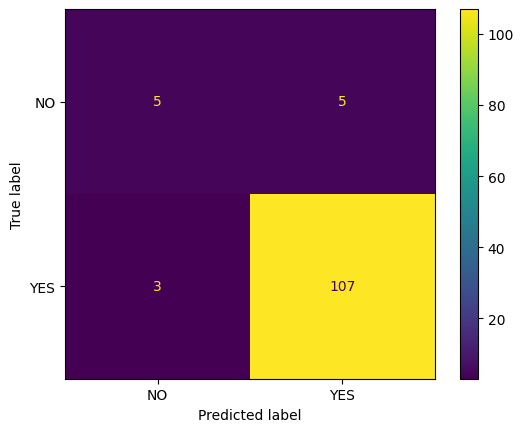

In [113]:
cm = confusion_matrix(y_test, dttest_pred)
cp = ConfusionMatrixDisplay(cm, display_labels=dtmodel.classes_)
cp.plot()
plt.show()

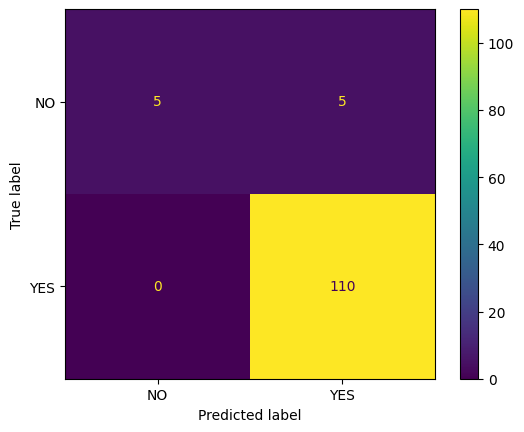

In [114]:
cm2 = confusion_matrix(y_test, rftest_pred)
cp2 = ConfusionMatrixDisplay(cm2, display_labels=rfmodel.classes_)
cp2.plot()
plt.show()

Interpretation: Based on the evaluation metrics, both the decision tree and random forest models perform well, but the random forest model appears to have a slight edge in overall performance. The cross-validation scores show that the random forest model achieves a mean accuracy of 92.5% compared to the decision tree's 91.25%. Looking at the confusion matrices, the random forest model makes fewer misclassifications on the positive class (YES), with 110 correct predictions and 0 false negatives, while the decision tree model has 107 correct predictions and 3 false negatives. Both models show identical performance on the negative class (NO), with 5 correct predictions and 5 false positives each. This suggests that the random forest model is particularly better at identifying candidates who should be admitted, eliminating false negatives entirely, while maintaining the same level of performance for identifying non-admissions as the decision tree model.


### Recommendation using burger-king-menu-2.csv


In [115]:
df2 = pd.read_csv("burger-king-menu-2.csv")

In [116]:
df2.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g)
0,Whopper® Sandwich,Burgers,660,360,40.0,12.0,1.5,90,980,49,2,11,28
1,Whopper® Sandwich with Cheese,Burgers,740,420,46.0,16.0,2.0,115,1340,50,2,11,32
2,Bacon & Cheese Whopper® Sandwich,Burgers,790,460,51.0,17.0,2.0,125,1560,50,2,11,35
3,Double Whopper® Sandwich,Burgers,900,520,58.0,20.0,3.0,175,1050,49,2,11,48
4,Double Whopper® Sandwich with Cheese,Burgers,980,580,64.0,24.0,3.0,195,1410,50,2,11,52


In [117]:
df2.shape

(77, 13)

In [118]:
df2['Category'].value_counts()

Category
Breakfast    33
Burgers      26
Chicken      18
Name: count, dtype: int64

In [119]:
df_burgers = df2[df2['Category'] == 'Burgers']
df_burgers = df_burgers.drop(['Category'], axis=1)

df_burgers.head()

,Item,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g)
0,Whopper® Sandwich,660,360,40.0,12.0,1.5,90,980,49,2,11,28
1,Whopper® Sandwich with Cheese,740,420,46.0,16.0,2.0,115,1340,50,2,11,32
2,Bacon & Cheese Whopper® Sandwich,790,460,51.0,17.0,2.0,125,1560,50,2,11,35
3,Double Whopper® Sandwich,900,520,58.0,20.0,3.0,175,1050,49,2,11,48
4,Double Whopper® Sandwich with Cheese,980,580,64.0,24.0,3.0,195,1410,50,2,11,52


In [120]:
df_burgers.shape

(26, 12)

In [121]:
len(df_burgers['Item'].unique())

24

In [122]:
df_burgers = df_burgers.drop_duplicates()

In [123]:
X = df_burgers.drop(['Item'], axis=1)
Y = df_burgers['Item']

In [124]:
dt2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=99)

In [125]:
dtmodel2 = dt2.fit(X,Y)

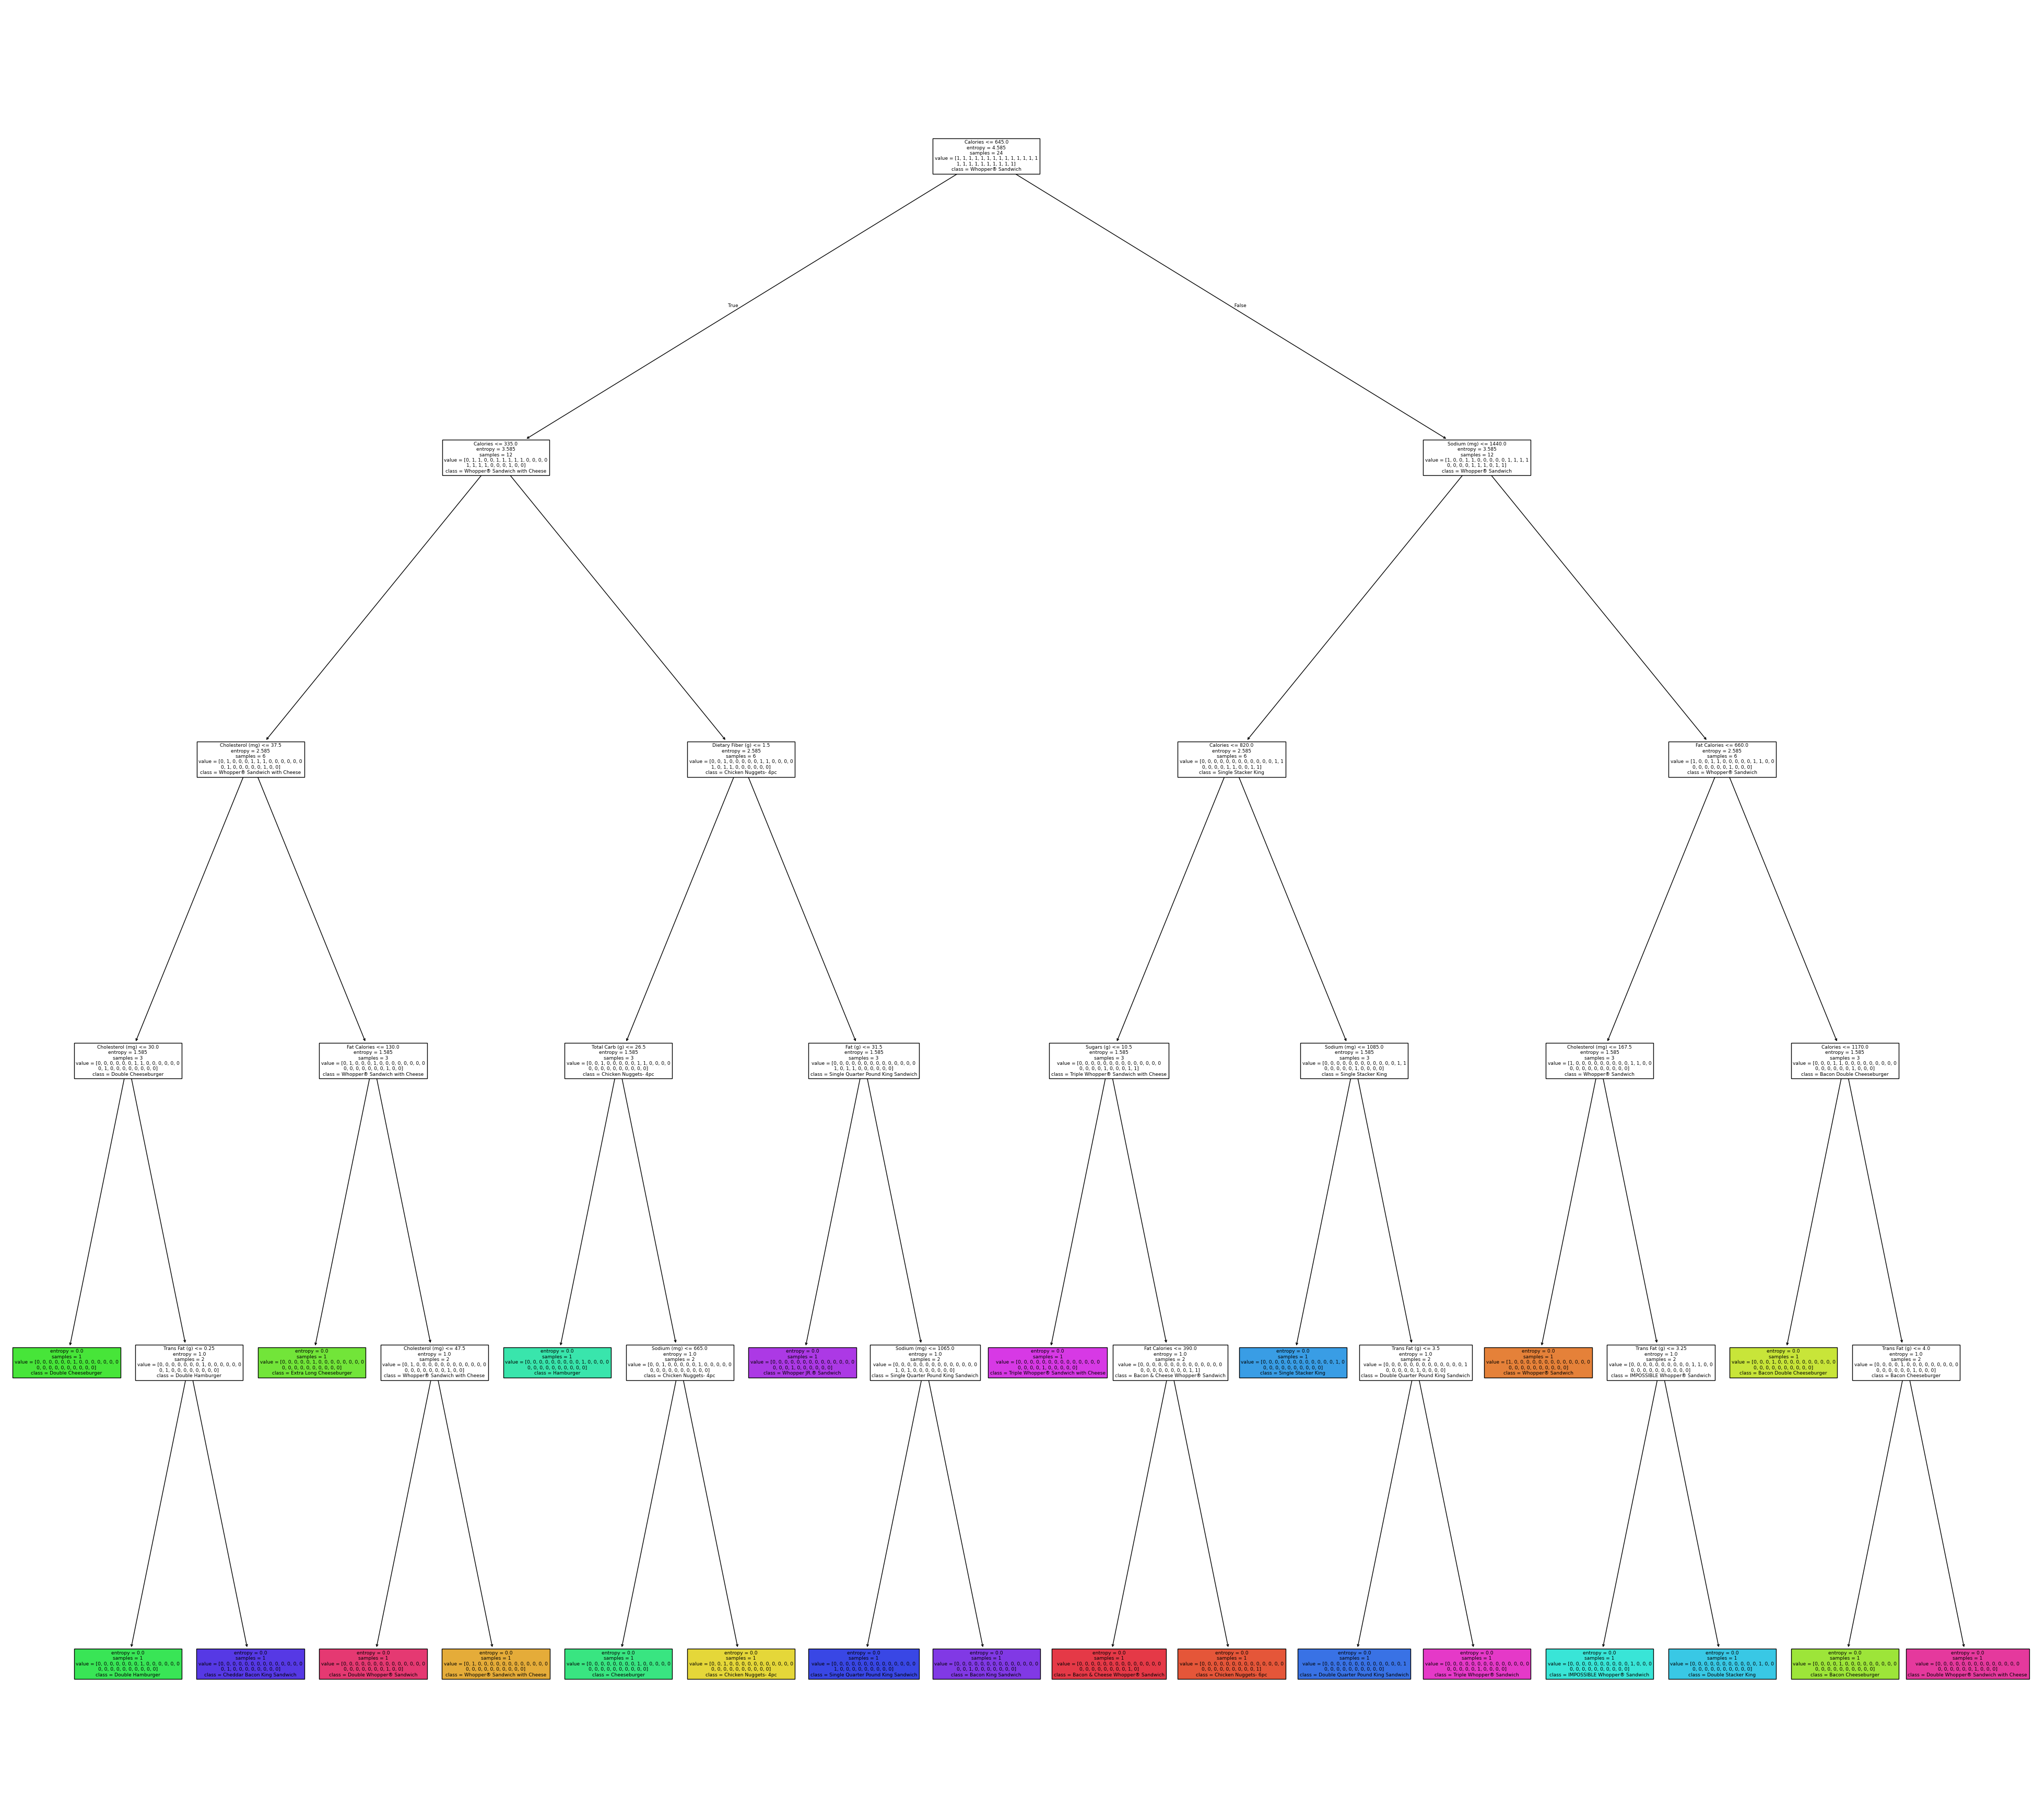

In [126]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel2, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)
plt.savefig('Recommender.png', format='png', dpi=150)

Interpretation: This decision tree can be used to make recommendations for food items in the Burgers category based on their nutritional value. The most important feature as per this decision tree is the Calorie content which is the root node. For those looking a meal with low-caloric value, they can opt for items like Chicken Nuggets, Hamburgers or Cheeseburgers. On the other end, for a more heavier meal, there are items like Triple Whopper Sandwich and Bacon King Sandwich, which also pack a high amount of protein, fat, and sodium content. IMPOSSIBLE Whopper® Sandwich is another unique option with high carbs and low cholestrol.
